# Linear model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [30]:
filepath = '../../../data/processed/df_filtered_5years.xlsx'
df = pd.read_excel(filepath).drop(columns='special')
df['population_change_rate'] = df.groupby('island_id')['population'].pct_change()
df['log_income'] = np.log(df['income'])
df.dropna(inplace=True)

/tmp/ipykernel_37114/3903975906.py:3: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['population_change_rate'] = df.groupby('island_id')['population'].pct_change()


In [31]:
df

,island,year,island_id,region_code,region_name,prefecture_code,population,dummy_island_has_bridge,dummy_island_is_connected_mainland,year_bridge_opened,dummy_after_bridge_opened,year_connect_mainland,dummy_after_connect_mainland,income,prefecture_name,area_km2,distance_m,population_change_rate,log_income
5,島後,2005,62,32528,隠岐の島町,32,17259.0,0.0,0.0,0.0,0.0,0.0,0.0,2030.888121,島根県,241.53,67840.0,-0.060326,7.616228
6,島後,2010,62,32528,隠岐の島町,32,15930.0,0.0,0.0,0.0,0.0,0.0,0.0,1725.990958,島根県,241.53,67840.0,-0.077003,7.453557
7,島後,2015,62,32528,隠岐の島町,32,14901.0,0.0,0.0,0.0,0.0,0.0,0.0,1613.531700,島根県,241.53,67840.0,-0.064595,7.386181
8,島後,2020,62,32528,隠岐の島町,32,13882.0,0.0,0.0,0.0,0.0,0.0,0.0,1686.173400,島根県,241.53,67840.0,-0.068385,7.430217
11,中ノ島,1990,63,32525,海士町,32,3119.0,0.0,0.0,0.0,0.0,0.0,0.0,317.642982,島根県,32.29,49730.0,-0.065888,5.760928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,鵜来島,2020,225,39208,宿毛市,39,38.0,0.0,0.0,0.0,0.0,0.0,0.0,2005.350219,高知県,1.31,11810.0,-0.116279,7.603574
1470,柏島,2000,226,39424,大月町,39,398.0,1.0,1.0,1957.0,1.0,1957.0,1.0,511.336980,高知県,0.56,110.0,-0.047847,6.237029
1472,柏島,2010,226,39424,大月町,39,457.0,1.0,1.0,1957.0,1.0,1957.0,1.0,390.383344,高知県,0.56,110.0,0.148241,5.967129
1473,柏島,2015,226,39424,大月町,39,284.0,1.0,1.0,1957.0,1.0,1957.0,1.0,406.472100,高知県,0.56,110.0,-0.378556,6.007515


<Axes: xlabel='population_change_rate', ylabel='Count'>

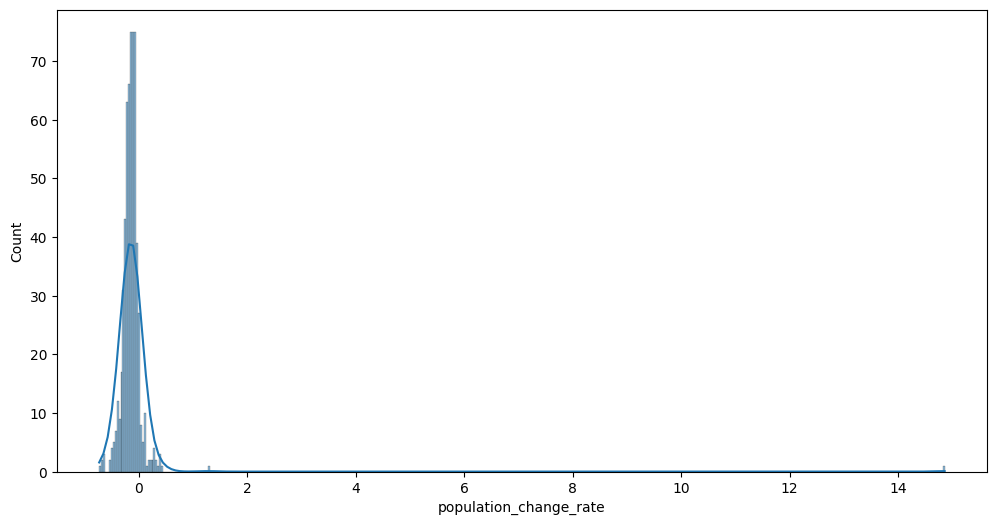

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(df['population_change_rate'], kde=True)

In [33]:
# 四分位範囲（IQR）を計算
Q1 = df['population_change_rate'].quantile(0.25)
Q3 = df['population_change_rate'].quantile(0.75)
IQR = Q3 - Q1

# 外れ値の定義
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 外れ値を除外
df_filtered = df[(df['population_change_rate'] >= lower_bound) & (df['population_change_rate'] <= upper_bound)]

df_filtered

,island,year,island_id,region_code,region_name,prefecture_code,population,dummy_island_has_bridge,dummy_island_is_connected_mainland,year_bridge_opened,dummy_after_bridge_opened,year_connect_mainland,dummy_after_connect_mainland,income,prefecture_name,area_km2,distance_m,population_change_rate,log_income
5,島後,2005,62,32528,隠岐の島町,32,17259.0,0.0,0.0,0.0,0.0,0.0,0.0,2030.888121,島根県,241.53,67840.0,-0.060326,7.616228
6,島後,2010,62,32528,隠岐の島町,32,15930.0,0.0,0.0,0.0,0.0,0.0,0.0,1725.990958,島根県,241.53,67840.0,-0.077003,7.453557
7,島後,2015,62,32528,隠岐の島町,32,14901.0,0.0,0.0,0.0,0.0,0.0,0.0,1613.531700,島根県,241.53,67840.0,-0.064595,7.386181
8,島後,2020,62,32528,隠岐の島町,32,13882.0,0.0,0.0,0.0,0.0,0.0,0.0,1686.173400,島根県,241.53,67840.0,-0.068385,7.430217
11,中ノ島,1990,63,32525,海士町,32,3119.0,0.0,0.0,0.0,0.0,0.0,0.0,317.642982,島根県,32.29,49730.0,-0.065888,5.760928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,鵜来島,2020,225,39208,宿毛市,39,38.0,0.0,0.0,0.0,0.0,0.0,0.0,2005.350219,高知県,1.31,11810.0,-0.116279,7.603574
1470,柏島,2000,226,39424,大月町,39,398.0,1.0,1.0,1957.0,1.0,1957.0,1.0,511.336980,高知県,0.56,110.0,-0.047847,6.237029
1472,柏島,2010,226,39424,大月町,39,457.0,1.0,1.0,1957.0,1.0,1957.0,1.0,390.383344,高知県,0.56,110.0,0.148241,5.967129
1473,柏島,2015,226,39424,大月町,39,284.0,1.0,1.0,1957.0,1.0,1957.0,1.0,406.472100,高知県,0.56,110.0,-0.378556,6.007515


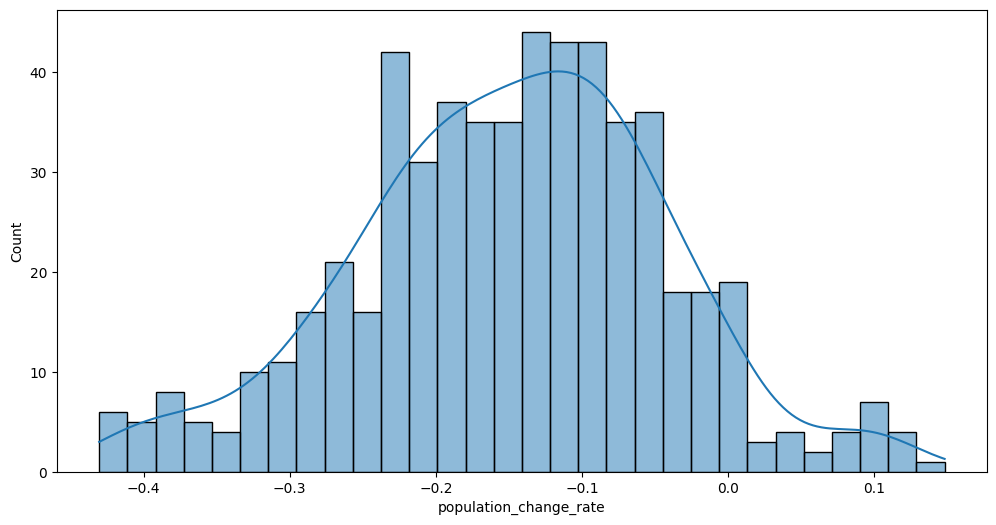

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['population_change_rate'], bins=30, kde=True)
plt.show()

In [36]:
endog = df_filtered['population_change_rate']
exog = df_filtered[['dummy_after_bridge_opened', 'log_income']]
exog = sm.add_constant(exog)

model = sm.OLS(endog, exog)
results = model.fit()
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     population_change_rate   R-squared:                       0.035
Model:                                OLS   Adj. R-squared:                  0.032
Method:                     Least Squares   F-statistic:                     10.26
Date:                    Mon, 14 Oct 2024   Prob (F-statistic):           4.19e-05
Time:                            17:35:09   Log-Likelihood:                 472.90
No. Observations:                     563   AIC:                            -939.8
Df Residuals:                         560   BIC:                            -926.8
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [37]:
residuals = results.resid

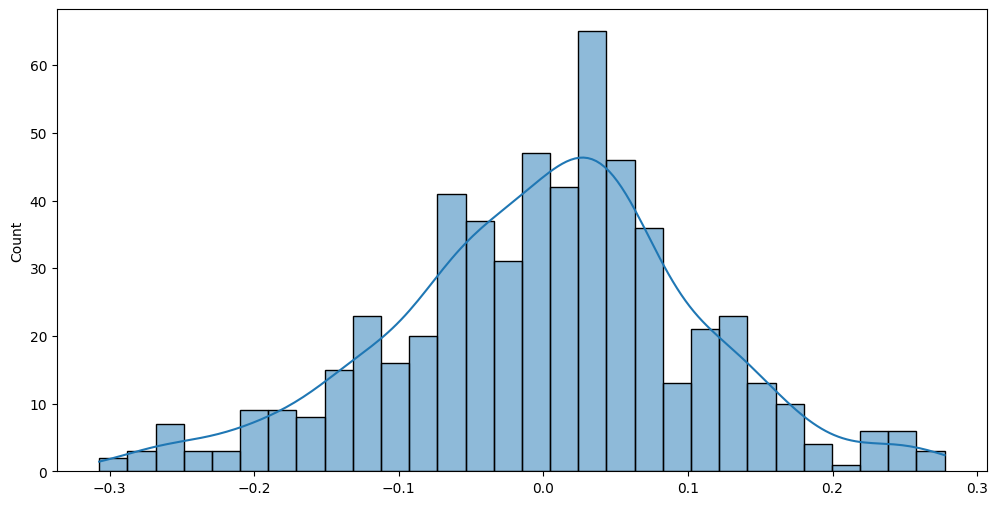

In [39]:
plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.show()

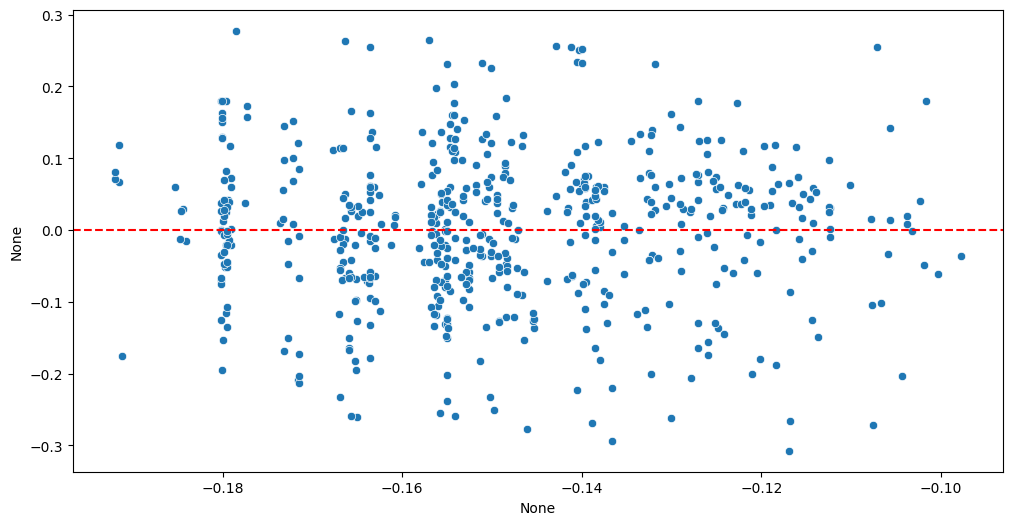

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=results.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()